OHO

In [67]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, transpile, assemble, execute
from qiskit.providers.aer.library import save_statevector
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import array_to_latex
from scipy.linalg import expm
from fable import fable
import numpy as np
import random

In [68]:
psi = Statevector.from_label("0")
A = Operator(np.outer(np.conjugate(psi), psi))
A.is_unitary()

False

In [69]:
A = np.asarray(A)
circ, alpha = fable(A, 0)
for i in range(2):
    circ.add_register(ClassicalRegister(1))

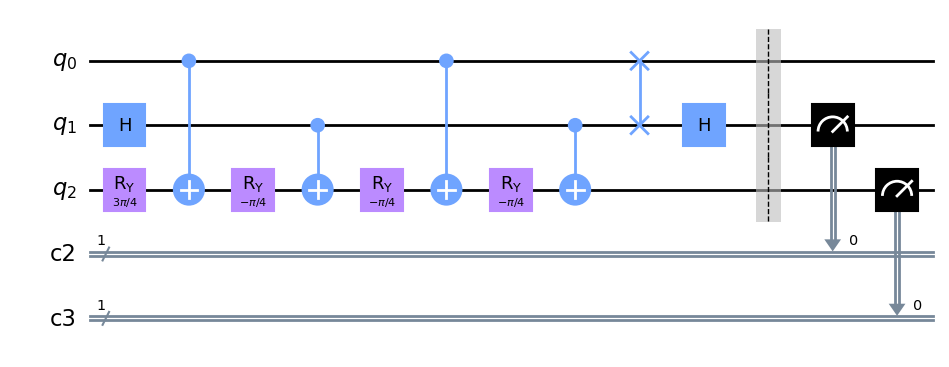

In [70]:
circ.barrier()
circ.measure([1, 2], [0, 1])
circ.draw("mpl")

In [97]:
nshots = 10
eps = 1e-10

In [72]:
backend = Aer.get_backend("statevector_simulator")
circ.save_statevector(label = 'test', pershot = True)
result = execute(circ, backend = backend, shots = nshots).result()
states = []
            
    

In [92]:
print( result.data(0)['test'])

[Statevector([ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
              0.00000000e+00+0.j, -7.85046229e-17+0.j,  1.00000000e+00+0.j,
             -0.00000000e+00+0.j,  0.00000000e+00+0.j],
            dims=(2, 2, 2)), Statevector([ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
              0.00000000e+00+0.j, -0.00000000e+00+0.j,  0.00000000e+00+0.j,
             -7.85046229e-17+0.j,  1.00000000e+00+0.j],
            dims=(2, 2, 2)), Statevector([ 1.00000000e+00+0.j,  3.92523115e-17+0.j,  0.00000000e+00+0.j,
              0.00000000e+00+0.j, -0.00000000e+00+0.j,  0.00000000e+00+0.j,
             -0.00000000e+00+0.j,  0.00000000e+00+0.j],
            dims=(2, 2, 2)), Statevector([ 1.00000000e+00+0.j,  3.92523115e-17+0.j,  0.00000000e+00+0.j,
              0.00000000e+00+0.j, -0.00000000e+00+0.j,  0.00000000e+00+0.j,
             -0.00000000e+00+0.j,  0.00000000e+00+0.j],
            dims=(2, 2, 2)), Statevector([ 0.00000000e+00+0.j,  0.00000000e+00+0

In [99]:
for i in range(nshots):
        rdata = result.data(0)['test'][:][i].data
        if all(abs(j) <= eps for j in rdata[1:]):
            psi = result.data(0)['test'][:][i]


In [100]:
print(np.average(psi, axis = 0))

(0.125+0j)


In [104]:
N = 6 # NÚMERO DE ESPINES
h = 1.0 #INTENSIDAD DEL CAMPO TRANSVERSAL
jx = 0.5 # INTERACCIÓN DE INTERCAMBIO EN X
jy = 1.25 # INTERACCIÓN DE INTERCAMBIO EN Y
jz = 2.0 # INTERACCIÓN DE INTERCAMBIO EN Z
H_heisenberg = transverse_field_heisenberg(N, h, jx, jy, jz)
print(H_heisenberg)

[[-10.  +0.j  -1.  +0.j  -1.  +0.j ...   0.  +0.j   0.  +0.j   0.  +0.j]
 [ -1.  +0.j  -6.  +0.j  -1.75+0.j ...   0.  +0.j   0.  +0.j   0.  +0.j]
 [ -1.  +0.j  -1.75+0.j  -2.  +0.j ...   0.  +0.j   0.  +0.j   0.  +0.j]
 ...
 [  0.  +0.j   0.  +0.j   0.  +0.j ...  -2.  +0.j  -1.75+0.j  -1.  +0.j]
 [  0.  +0.j   0.  +0.j   0.  +0.j ...  -1.75+0.j  -6.  +0.j  -1.  +0.j]
 [  0.  +0.j   0.  +0.j   0.  +0.j ...  -1.  +0.j  -1.  +0.j -10.  +0.j]]


In [108]:
k = 0.5
T = 1
beta = 1/(k*T)

In [117]:
Q = Qop(beta,H_heisenberg)

In [118]:
print(Q)

[[  7450958.46746593+0.j  -4203296.72636264+0.j -13354578.3683846 +0.j
  ... -13324440.52033561+0.j  -4213354.68173046+0.j
    7432527.72625436+0.j]
 [ -4203296.72636265+0.j  25806907.51808167+0.j -26526163.49711436+0.j
  ...  41527683.82691811+0.j -21029498.42546488+0.j
   -4213354.68173043+0.j]
 [-13354578.36838458+0.j -26526163.4971144 +0.j  74206754.55370486+0.j
  ... -25031029.71226855+0.j  41527683.82691821+0.j
  -13324440.52033567+0.j]
 ...
 [-13324440.5203356 +0.j  41527683.82691804+0.j -25031029.71226846+0.j
  ...  74206754.5537045 +0.j -26526163.49711432+0.j
  -13354578.36838453+0.j]
 [ -4213354.68173045+0.j -21029498.4254649 +0.j  41527683.82691821+0.j
  ... -26526163.49711438+0.j  25806907.5180817 +0.j
   -4203296.72636267+0.j]
 [  7432527.72625435+0.j  -4213354.68173042+0.j -13324440.52033567+0.j
  ... -13354578.36838453+0.j  -4203296.72636268+0.j
    7450958.46746593+0.j]]


In [116]:
def Qop(beta,H):
    return(expm(H*beta))

In [ ]:
def BCcirc(Q,circHaar):
    Q = np.asarray(Q)
    circ, alpha = fable(Q,0)
    qc = circHaar.compose(circ)
    return qc

In [ ]:
def circ_haar_1d(qc,n1d):
    for j in range (n1d): qc.append(haar_random_gate, [j])
    for j in range (n1d-1): qc.cx(j,j+1)
    for j in range (n1d): qc.append(haar_random_gate, [j])
    for j in range (n1d-1): qc.cx(j+1,j)

def circ_haar_2d(qc,x2d,y2d):
    for j in range (x2d*y2d): qc.append(haar_random_gate, [j])
    for j in range (x2d-1):
        for k in range (y2d-1): qc.cx(k*x2d+j,k*x2d+(j+1))
    for j in range (x2d*y2d): qc.append(haar_random_gate, [j])
    for j in range (x2d-1):
        for k in range (y2d-1): qc.cx(k*x2d+(j+1),k*x2d+j)
    for j in range (x2d*y2d): qc.append(haar_random_gate, [j])
    for j in range (x2d-1):
        for k in range (y2d-1): qc.cx(k*x2d+j,(k+1)*x2d+j)
    for j in range (x2d*y2d): qc.append(haar_random_gate, [j])
    for j in range (x2d-1):
        for k in range (y2d-1): qc.cx((k+1)*x2d+j,k*x2d+j)

def haar_1d(nrep,n1d):
  hchain=[]
  for j in range (nrep+1):
      qc1 = QuantumCircuit(n1d)
      for k in range (j): circ_haar_1d(qc1,n1d)
      qc1.save_statevector()
      state = sim.run(qc1,shots=1).result().get_statevector()
      probs = Statevector(state).probabilities()
      hstate=0;
      for j in range(2**n1d): hstate+=-(probs[j]*np.log(probs[j]))
      hchain.append(hstate)
  hchain[0]=0
  return hchain

def haar_2d(nrep,x2d,y2d):
  hchain=[]
  for j in range (nrep+1):
      qc1 = QuantumCircuit(x2d*y2d)
      for k in range (j): circ_haar_2d(qc1,x2d,y2d)
      qc1.save_statevector()
      state = sim.run(qc1,shots=1).result().get_statevector()
      probs = Statevector(state).probabilities()
      hstate=0;
      for j in range(2**(x2d*y2d)): hstate+=-(probs[j]*np.log(probs[j]))
      hchain.append(hstate)
  hchain[0]=0
  return hchain

In [102]:
def transverse_field_heisenberg(N, h, jx, jy, jz):
    id = np.array([[1, 0], [0, 1]])
    σx = np.array([[0, 1], [1, 0]])
    σz = np.array([[1, 0], [0, -1]])
    σy = np.array([[0, -1j], [1j, 0]])
    first_term_ops = [id.copy() for _ in range(N)]
    first_term_ops[0] = σx.copy()
    first_term_ops[1] = σx.copy()
    first_term_ops_n = [id.copy() for _ in range(N)]
    first_term_ops_n[0] = σx.copy()
    first_term_ops_n[1] = σx.copy()
    second_term_ops = [id.copy() for _ in range(N)]
    second_term_ops[0] = σy.copy()
    second_term_ops[1] = σy.copy()
    second_term_ops_n = [id.copy() for _ in range(N)]
    second_term_ops_n[0] = σy.copy()
    second_term_ops_n[1] = σy.copy()
    third_term_ops = [id.copy() for _ in range(N)]
    third_term_ops[0] = σz.copy()
    third_term_ops[1] = σz.copy()
    third_term_ops_n = [id.copy() for _ in range(N)]
    third_term_ops_n[0] = σz.copy()
    third_term_ops_n[1] = σz.copy()
    fourth_term_ops = [id.copy() for _ in range(N)]
    fourth_term_ops[0] = σx.copy()
    fourth_term_ops_n = [id.copy() for _ in range(N)]
    fourth_term_ops_n[0] = σx.copy()
    H_dim = 2 ** N
    H = np.zeros((H_dim, H_dim))
    indexs = range(N)
    for i in range(1, N):
        first_term_tensor = np.kron(first_term_ops[N-2], first_term_ops[N-1])
        for j in range(3, N+1):
            first_term_tensor = np.kron(first_term_ops[N-j], first_term_tensor)
        H = H - jx*first_term_tensor
        indexs = np.roll(indexs, 1)
        first_term_ops = [first_term_ops_n[k] for k in indexs]
    indexs = range(N)
    for i in range(1, N):
        second_term_tensor = np.kron(second_term_ops[N-2], second_term_ops[N-1])
        for j in range(3, N+1):
            second_term_tensor = np.kron(second_term_ops[N-j], second_term_tensor)
        H = H - jy*second_term_tensor
        indexs = np.roll(indexs, 1)
        second_term_ops = [second_term_ops_n[k] for k in indexs]
    indexs = range(N)
    for i in range(1, N):
        third_term_tensor = np.kron(third_term_ops[N-2], third_term_ops[N-1])
        for j in range(3, N+1):
            third_term_tensor = np.kron(third_term_ops[N-j], third_term_tensor)
        H = H - jz*third_term_tensor
        indexs = np.roll(indexs, 1)
        third_term_ops = [third_term_ops_n[k] for k in indexs]
    indexs = range(N)
    for i in range(N):
        fourth_term_tensor = np.kron(fourth_term_ops[N-2], fourth_term_ops[N-1])
        for j in range(3, N+1):
            fourth_term_tensor = np.kron(fourth_term_ops[N-j], fourth_term_tensor)
        H = H - h * fourth_term_tensor
        indexs = np.roll(indexs, 1)
        fourth_term_ops = [fourth_term_ops_n[k] for k in indexs]
    return H